<a href="https://colab.research.google.com/github/Sagalo04/ClasePP/blob/master/ClasePP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/PDI/Interpolation/'
os.chdir(path)
!pwd
# graficar imagenes estadisticas en el notebook

%matplotlib inline

/content/drive/My Drive/PDI/Interpolation


In [0]:
def displayGray3(a,b,c,title1 = "Original", title2="Edited", title3="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(131), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c,cmap='gray'), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayGray2(a,b,title1 = "Original", title2="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor3(a,b,c,title1 = "Original", title2="Edited", title3="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(131), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor2(a,b,title1 = "Original", title2="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def readRGB(imgPath):
  img=cv2.imread(imgPath)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

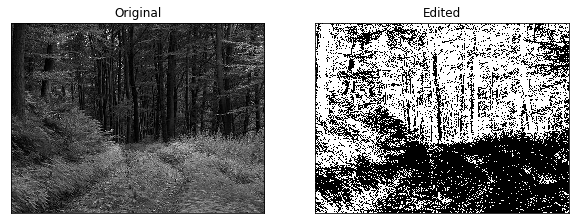

In [0]:
def binarizacion(img,minr=10,maxr=60):
  img = cv2.imread(img,0)
  
  row,column = img.shape
  
  img1 = np.zeros((row,column), dtype = 'uint8')
  
  min_range = minr
  max_range = maxr
  
  for i in range(row):
    for j in range(column):
      if img[i,j]>min_range and img[i,j]<max_range:
        img1[i,j]=255
      else:
        img1[i,j]=0
        
  # Display the image
  
  displayGray2(img,img1)
  
  
binarizacion('tree.png',10,60)
  
      

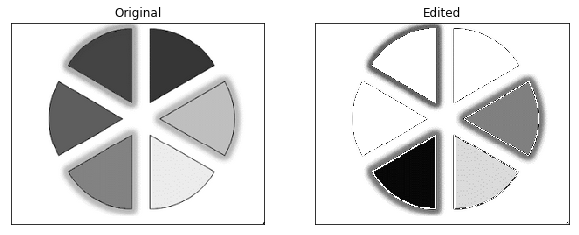

In [0]:
def Fraccionamiento(img, minr=10,maxr=60):
  #Cargar imagen
  img = cv2.imread(img, 0)
  rows,columns= img.shape
  img2 = np.zeros((rows,columns), dtype = np.uint8)
  
  #intervalos
  a = minr
  b = maxr
  
  
  for x in range(0,rows):
    for y in range(0,columns):
      r = img[x][y]
      if a<=r and r<=b:
        img2[x,y] =255
      else:
        img2[x,y]=img[x,y]
        
  displayGray2(img,img2)
  return
  
Fraccionamiento('pastel.png',0,125)

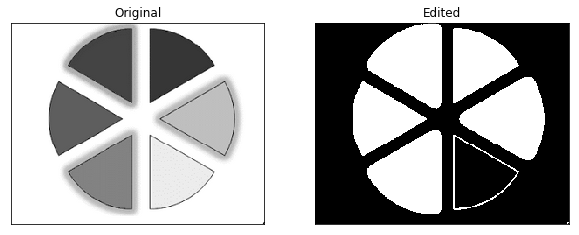

In [0]:
def threshold(img,thres):
  img = cv2.imread(img,0)
  rows,columns = img.shape
  img2 = np.zeros((rows,columns),dtype = np.uint8)
  
  T = thres
  
  for x in range(rows):
    for y in range(columns):
      r = img[x,y]
      if T<=r:
        img2[x,y]=0
      else:
        img2[x,y]=255
        
  displayGray2(img,img2)
  return

threshold('pastel.png',220)

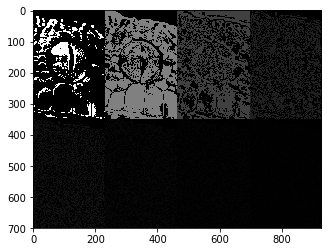

In [0]:
img = cv2.imread('ojo.jpg',0)
 
#Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits
 
# We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])
 
#Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv =cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])
 
# Vertically concatenate
final = cv2.vconcat([finalr,finalv])
plt.imshow(final,cmap='gray')

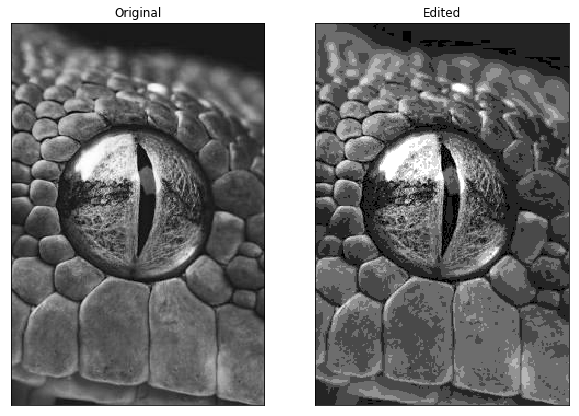

In [0]:
new_img = eight_bit_img+seven_bit_img+six_bit_img
#plt.imshow(new_img,cmap='gray')
displayGray2(img,new_img)